In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

# spline
from scipy.interpolate import UnivariateSpline

In [2]:
work_dir = "dir/Li-Co-O"

In [3]:
os.chdir(work_dir)

with open("valley.pkl", "rb") as f:
    data, ratio_form = pickle.load(f)
x = data[:, 0]
y = data[:, 1]

In [4]:
cs = UnivariateSpline(x, y, k=3, s=0.2)

In [5]:
x_new = np.linspace(x.min(), x.max(), 500)
y_new = cs(x_new)

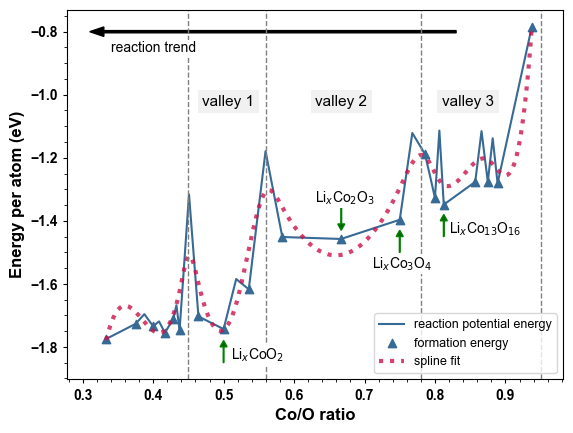

In [34]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots()
# 图曲线，散点，spline拟合曲线
ax.plot(data[:, 0], data[:, 1], c="#376A95", alpha=1, linewidth=1.5)
ax.scatter(ratio_form[:, 0], ratio_form[:, 1], marker="^", c="#376A95")
ax.plot(x_new, y_new, c="#cc1149", linewidth=3, ls=":", alpha=0.8)

# 设置坐标轴
ax.set_xlabel("Co/O ratio", fontweight="bold", fontsize=12)
ax.set_ylabel("Energy per atom (eV)", fontweight="bold", fontsize=12)
ax.tick_params(direction="out", length=3)
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
ax.minorticks_on()
ax.tick_params(which="minor", direction="out", length=2)

# 图注
plt.legend(["reaction potential energy", "formation energy", "spline fit"], loc="lower right", fontsize=9)

# 设置辅助线
plt.axvline(x=0.45, ls="--", c="gray", lw=1)
plt.axvline(x=0.56, ls="--", c="gray", lw=1)

textstr_1 = "valley 1"
props = dict(boxstyle="square", facecolor="lightgrey", alpha=0.3, edgecolor="none")
ax.text(0.47, -1.0, textstr_1, fontsize=11, verticalalignment="top", bbox=props)

plt.axvline(x=0.78, ls="--", c="gray", lw=1)
textstr_2 = "valley 2"
ax.text(0.63, -1.0, textstr_2, fontsize=11, verticalalignment="top", bbox=props)

plt.axvline(x=0.95, ls="--", c="gray", lw=1)
textstr_3 = "valley 3"
ax.text(0.81, -1.0, textstr_3, fontsize=11, verticalalignment="top", bbox=props)

# 反应趋势箭头
ax.arrow(0.83, -0.8, -0.5, 0, head_width=0.03, head_length=0.02, fc="k", ec="k", width=0.007, alpha=1)
props_2 = dict(boxstyle="square,pad=0.1", facecolor="white", alpha=1, edgecolor="none")
ax.text(0.34, -0.83, "reaction trend", fontsize=10, verticalalignment="top", bbox=props_2)

# LiCoO2箭头
ax.text(0.51, -1.80, "Li$_x$CoO$_2$", fontsize=10, verticalalignment="top", bbox=props_2)
ax.arrow(0.5, -1.85, 0, 0.05, head_width=0.01, head_length=0.02, alpha=1, ec="green", fc="darkgreen")

# LiCo2O3箭头
ax.text(0.63, -1.3, "Li$_x$Co$_2$O$_3$", fontsize=10, verticalalignment="top", bbox=props_2)
ax.arrow(0.667, -1.36, 0, -0.05, head_width=0.01, head_length=0.02, alpha=1, ec="green", fc="darkgreen")

# LiCo3O4箭头
ax.text(0.71, -1.51, "Li$_x$Co$_3$O$_4$", fontsize=10, verticalalignment="top", bbox=props_2)
ax.arrow(0.75, -1.5, 0, 0.05, head_width=0.01, head_length=0.02, alpha=1, ec="green", fc="darkgreen")

# Li3Co13O16箭头
ax.text(0.82, -1.4, "Li$_x$Co$_{13}$O$_{16}$", fontsize=10, verticalalignment="top", bbox=props_2)
ax.arrow(0.8125, -1.45, 0, 0.05, head_width=0.01, head_length=0.02, alpha=1, ec="green", fc="darkgreen")

plt.savefig("valley.svg", format="svg")